<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expectation-Maximization" data-toc-modified-id="Expectation-Maximization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Expectation-Maximization</a></span><ul class="toc-item"><li><span><a href="#Expectation" data-toc-modified-id="Expectation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Expectation</a></span></li><li><span><a href="#Maximization" data-toc-modified-id="Maximization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Maximization</a></span></li><li><span><a href="#Running-the-algorithm" data-toc-modified-id="Running-the-algorithm-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Running the algorithm</a></span></li></ul></li><li><span><a href="#Prediction-and-results" data-toc-modified-id="Prediction-and-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction and results</a></span></li></ul></div>

# Homework 2 - Gaussian Mixture Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.datasets import make_spd_matrix as spd

In [7]:
n_samples = 300
np.random.seed(0)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [8]:
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

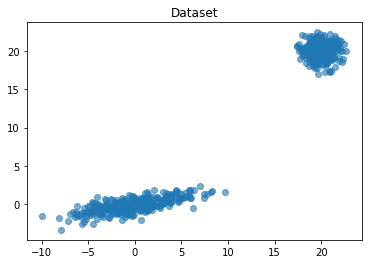

In [9]:
plt.scatter(X_train[:,0], X_train[:,1],alpha=0.6)
plt.title('Dataset')
plt.show()

Let's initialiaze the parameters

In [10]:
n = X_train.shape[1]

mu = np.random.rand(2,2)
phi = np.array([0.5, 0.5])
sigma = np.array([spd(2), spd(2)])

params = {
    'mu': mu,
    'phi': phi,
    'sigma': sigma
}

## Expectation-Maximization
### Expectation

In [11]:
def E_step(params, X_train):
    
    mu = params['mu']
    phi = params['phi']
    sigma = params['sigma']
    temp1, temp2 = np.zeros((600,1)), np.zeros((600,1))
    
    for i, x in enumerate(X_train):
        num1 = 1 / (np.power(2*np.pi, n/2.)*np.power(np.linalg.det(sigma[0]),0.5)) * np.exp(np.dot(np.dot(-0.5*(x.reshape(2,1) - mu[0].reshape(2,1)).T,np.linalg.inv(sigma[0])),(x.reshape(2,1)-mu[0].reshape(2,1))))*phi[0]
        num2 = 1 / (np.power(2*np.pi, n/2.)*np.power(np.linalg.det(sigma[1]),0.5)) * np.exp(np.dot(np.dot(-0.5*(x.reshape(2,1) - mu[1].reshape(2,1)).T,np.linalg.inv(sigma[1])),(x.reshape(2,1)-mu[1].reshape(2,1))))*phi[1]

        temp1[i] = num1/(num1+num2)
        temp2[i] = num2/(num1+num2)
    return np.array([temp1, temp2]).reshape(2, 600)

### Maximization

In [12]:
def M_step(w, X_train):
    
    phi = w.sum(axis=1)/len(X_train)
    
    mu = np.dot(w, X_train)/w.sum(axis=1)
    
    somme0, somme1, d0, d1 = 0, 0, 0, 0

    for i, x in enumerate(X_train):
        somme0 += w[0, i] * (x - mu[0]) * (x - mu[0]).reshape((2, 1))
        somme1 += w[1, i] * (x - mu[1]) * (x - mu[1]).reshape((2, 1))
        d0 += w[0, i]
        d1 += w[1, i]

    sigma0 = somme0 / d0
    sigma1 = somme1 / d1
    
    sigma = np.array([sigma0, sigma1])

    
    params = {
    'mu': mu,
    'phi': phi,
    'sigma': sigma
    }
    
    
    return params

### Running the algorithm

In [13]:
for i in range(50):
    w = E_step(params, X_train)
    params = M_step(w, X_train)

## Prediction and results

In [14]:
def pred(w):
    pred0, pred1 = [], []
    for i,el in enumerate(X_train):
        if w[0,i]>=0.5:
            pred0.append(el)
        else:
            pred1.append(el)
    return (np.array(pred0) , np.array(pred1))
pred0, pred1 = pred(w)

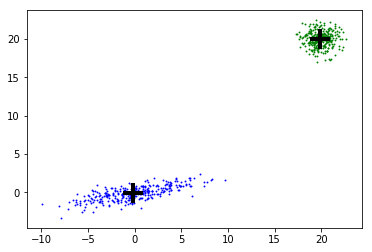

In [64]:
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)

plt.scatter(pred0[:,0], pred0[:,1], .8, c="b")
plt.scatter(pred1[:,0], pred1[:,1], .8, c="g")
plt.plot(params['mu'][:,0], params['mu'][:,1],'+', mew=4,ms=20, c='black')
plt.axis("tight")
plt.show()